# Support Vector Machines

### 16. Learning: Support Vector Machines by MIT OpenCourseWare

[![MIT](https://img.youtube.com/vi/_PwhiWxHK8o/0.jpg)](https://youtu.be/_PwhiWxHK8o)

### Support Vector Machines, Clearly Explained!!! by StatQuest with Josh Starmer

[![MIT](https://img.youtube.com/vi/efR1C6CvhmE/0.jpg)](https://youtu.be/efR1C6CvhmE)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import load_iris

In [5]:
data = load_iris()
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [9]:
df = pd.DataFrame(
    data['data'],
    columns = ['SL', 'SW', 'PL', 'PW']
)
df['target'] = data['target']
df['spesies'] = df['target'].apply(lambda x: data['target_names'][x])
df.head()

,SL,SW,PL,PW,target,spesies
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


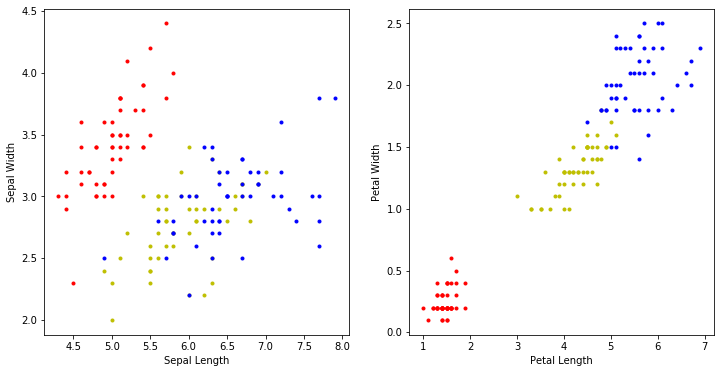

In [11]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.plot(df['SL'][df['target'] == 0], df['SW'][df['target'] == 0], 'r.')
plt.plot(df['SL'][df['target'] == 1], df['SW'][df['target'] == 1], 'y.')
plt.plot(df['SL'][df['target'] == 2], df['SW'][df['target'] == 2], 'b.')
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')
plt.subplot(122)
plt.plot(df['PL'][df['target'] == 0], df['PW'][df['target'] == 0], 'r.')
plt.plot(df['PL'][df['target'] == 1], df['PW'][df['target'] == 1], 'y.')
plt.plot(df['PL'][df['target'] == 2], df['PW'][df['target'] == 2], 'b.')
plt.xlabel('Petal Length'); plt.ylabel('Petal Width')
plt.show()

<hr>

### SVM Classifier

In [39]:
from sklearn.svm import SVC

In [40]:
mSepal = SVC(probability=True)
mPetal = SVC(probability=True)

In [41]:
mSepal.fit(df[['SL', 'SW']], df['target'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [42]:
mPetal.fit(df[['PL', 'PW']], df['target'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [43]:
mSepal.predict_proba(df[['SL', 'SW']])[:3]

array([[0.97537884, 0.01223226, 0.0123889 ],
       [0.89697867, 0.07096716, 0.03205417],
       [0.98688965, 0.00665993, 0.00645042]])

<hr>

### Plot Support Vector Grid Division

In [44]:
# 1. Convert vector => matrix
def meshgrid(x, y):
    x_min = x.min() - 1
    x_max = x.max() + 1
    y_min = y.min() - 1
    y_max = y.max() + 1
    xm, ym = np.meshgrid(
        np.arange(x_min, x_max, .01),
        np.arange(y_min, y_max, .01)
    )
    return xm, ym

In [45]:
slxm, swym = meshgrid(df['SL'], df['SW'])
plxm, pwym = meshgrid(df['PL'], df['PW'])

In [46]:
# 2. Plotting area & SVM
def svmPlot(posisi, model, lxm, wym):
    hasil = model.predict(np.c_[lxm.ravel(), wym.ravel()])
    hasil = hasil.reshape(lxm.shape)
    plot = posisi.contourf(
        lxm, wym, hasil, cmap='hot_r', alpha=.3
    )
    return plot

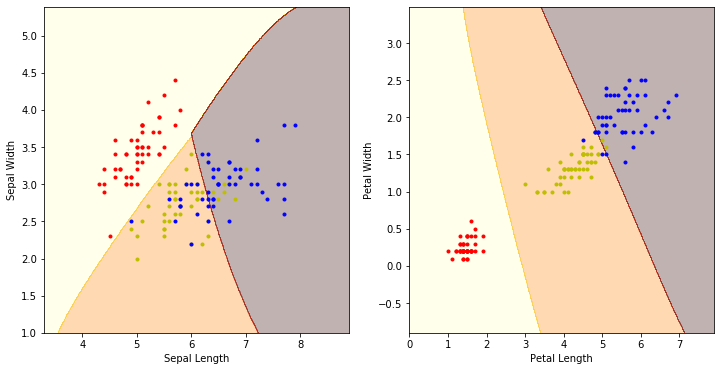

In [47]:
plt.figure(figsize=(12,6))
a = plt.subplot(121)
svmPlot(a, mSepal, slxm, swym)
plt.plot(df['SL'][df['target'] == 0], df['SW'][df['target'] == 0], 'r.')
plt.plot(df['SL'][df['target'] == 1], df['SW'][df['target'] == 1], 'y.')
plt.plot(df['SL'][df['target'] == 2], df['SW'][df['target'] == 2], 'b.')
plt.xlabel('Sepal Length'); plt.ylabel('Sepal Width')

b = plt.subplot(122)
svmPlot(b, mPetal, plxm, pwym)
plt.plot(df['PL'][df['target'] == 0], df['PW'][df['target'] == 0], 'r.')
plt.plot(df['PL'][df['target'] == 1], df['PW'][df['target'] == 1], 'y.')
plt.plot(df['PL'][df['target'] == 2], df['PW'][df['target'] == 2], 'b.')
plt.xlabel('Petal Length'); plt.ylabel('Petal Width')

plt.show()